In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertisement.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
top_10_sales=df.sort_values(by='Sales',ascending=False).head(10)
top_10_sales

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
36,266.9,43.8,5.0,25.4
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
128,220.3,49.0,3.2,24.7
17,281.4,39.6,55.8,24.4
61,261.3,42.7,54.7,24.2
101,296.4,36.3,100.9,23.8


In [33]:
df1=df.copy()
df1["total_spend"]=df["TV"]+df["Radio"]+df["Newspaper"]
df1.sort_values(by='total_spend',ascending=False).head(10)

,TV,Radio,Newspaper,Sales,total_spend
101,296.4,36.3,100.9,23.8,433.6
183,287.6,43.0,71.8,26.2,402.4
198,283.6,42.0,66.2,25.5,391.8
98,289.7,42.3,51.2,25.4,383.2
17,281.4,39.6,55.8,24.4,376.8
175,276.9,48.9,41.8,27.0,367.6
30,292.9,28.3,43.2,21.4,364.4
137,273.7,28.9,59.7,20.8,362.3
93,250.9,36.5,72.3,22.2,359.7
61,261.3,42.7,54.7,24.2,358.7


Text(0.5, 1.0, 'Correlation Matrix')

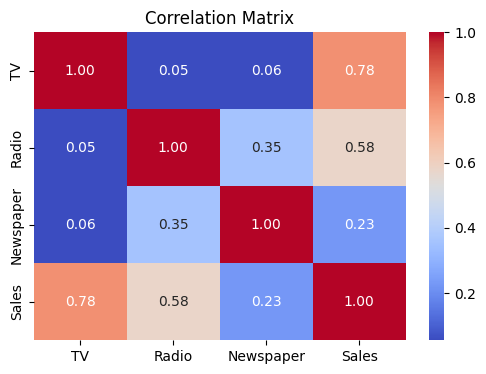

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix') 


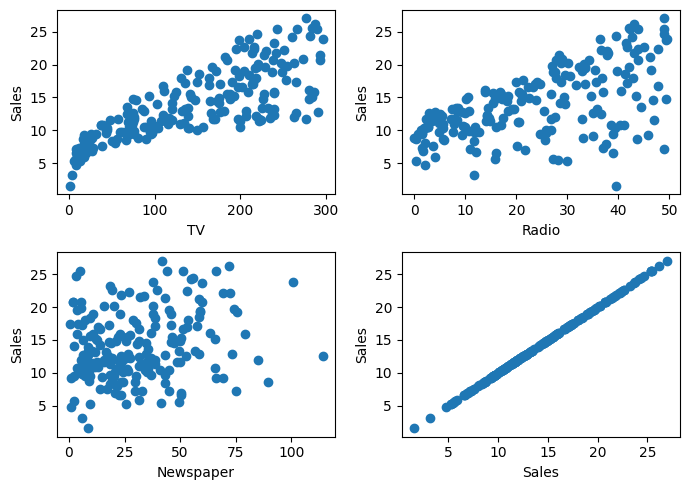

In [ ]:
plt.figure(figsize=(7,5))
for i, col in enumerate(df.columns[:4], 1):
    plt.subplot(2, 2,  i)
    plt.scatter(df[col], df["Sales"])
    plt.xlabel(col)
    plt.ylabel("Sales")
plt.tight_layout()
plt.show()

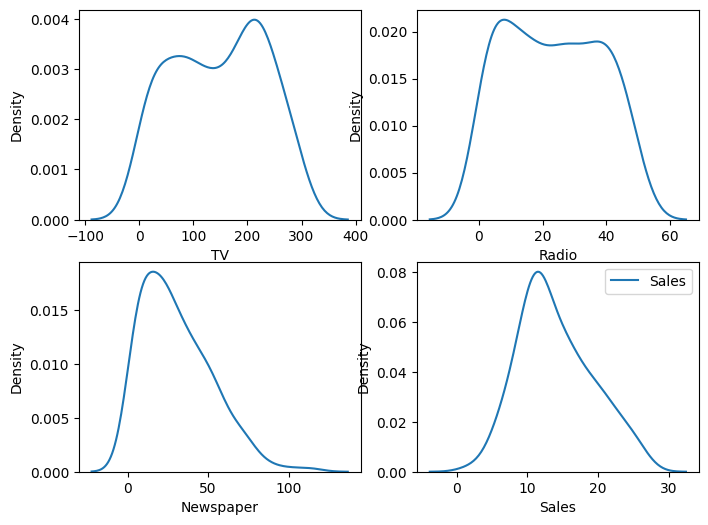

In [28]:
plt.figure(figsize=(8,6))

for i, col in enumerate(df.columns[:4], 1):
    plt.subplot(2, 2,  i)
    sns.kdeplot(df[col],label=col)
plt.legend()
plt.show()

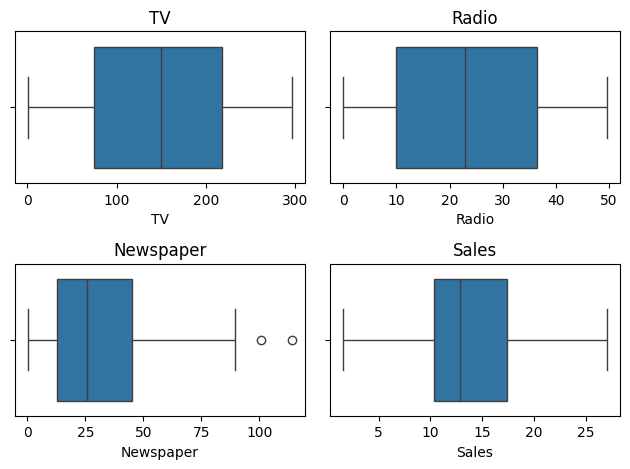

In [40]:
plt.figure()

for col in df.select_dtypes(include = ['number']).columns:
    plt.subplot(2, 2,df.columns.get_loc(col) + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [49]:
train_df, val_df = train_test_split(df, train_size = 0.75, random_state = 1)
train_df.head(2)

,TV,Radio,Newspaper,Sales
98,289.7,42.3,51.2,25.4
123,123.1,34.6,12.4,15.2


In [50]:
val_df.head(2)

,TV,Radio,Newspaper,Sales
58,210.8,49.6,37.7,23.8
40,202.5,22.3,31.6,16.6


In [52]:
x_train = train_df.drop("Sales", axis=1)
y_train = train_df["Sales"]

x_valid = val_df.drop("Sales", axis=1)
y_valid = val_df["Sales"]

In [54]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(x_train, y_train)
y_pred_train= model.predict(x_train)
y_pred_valid= model.predict(x_valid)


In [56]:
rmse=np.sqrt(mean_squared_error(y_train, y_pred_train))
r2=r2_score(y_train, y_pred_train)
print("Train RMSE:", rmse)
print("Train R2:", r2)
rmse=np.sqrt(mean_squared_error(y_valid, y_pred_valid))
r2=r2_score(y_valid, y_pred_valid)
print("Validation RMSE:", rmse)
print("Validation R2:", r2)

Train RMSE: 0.33492982349540945
Train R2: 0.996013634891079
Validation RMSE: 0.6415361096618021
Validation R2: 0.9823989896009261


In [57]:
import joblib
joblib.dump(model, 'advertisement_model.pkl')

['advertisement_model.pkl']